In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load your dataset
df = pd.read_csv('combined_data.csv')

# Gender Distribution
## How is the gender of participants distributed across the dataset?

<ipython-input-24-a4328a4313c3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette={'Female': '#F78888', 'Male': '#4A90E2'})


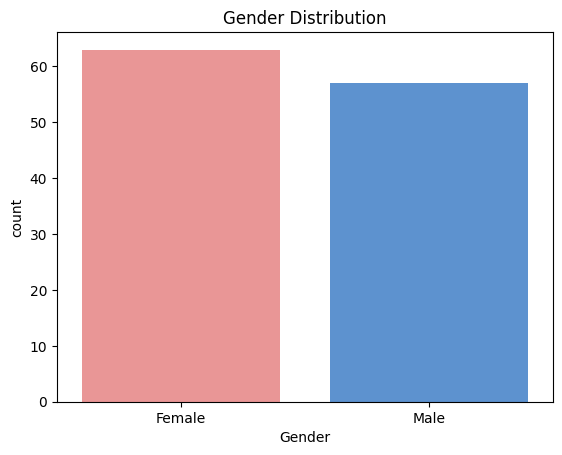

In [ ]:
sns.countplot(x='Gender', data=df, palette={'Female': '#F78888', 'Male': '#4A90E2'})
plt.title('Gender Distribution')
plt.show()

## Distribution of Stress Conditions (Segment)

<ipython-input-3-14f793c47eb5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=df, palette='coolwarm')


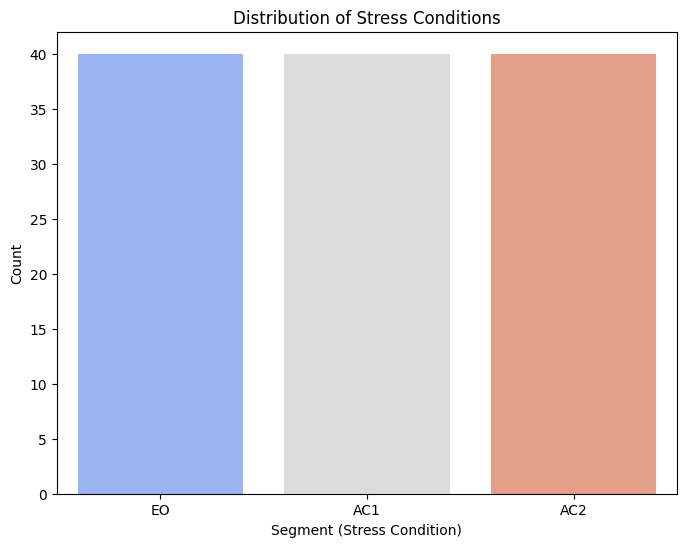

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Segment', data=df, palette='coolwarm')
plt.title('Distribution of Stress Conditions')
plt.xlabel('Segment (Stress Condition)')
plt.ylabel('Count')
plt.show()

This shows the distribution of different stress conditions across the dataset: EO (Baseline/Non-Stress), AC1 (Low Stress), and AC2 (High Stress). The visualization highlights that the number of samples for each stress condition is nearly equal, with each condition having around 40 samples.

## Gender Differences in Heart Rate

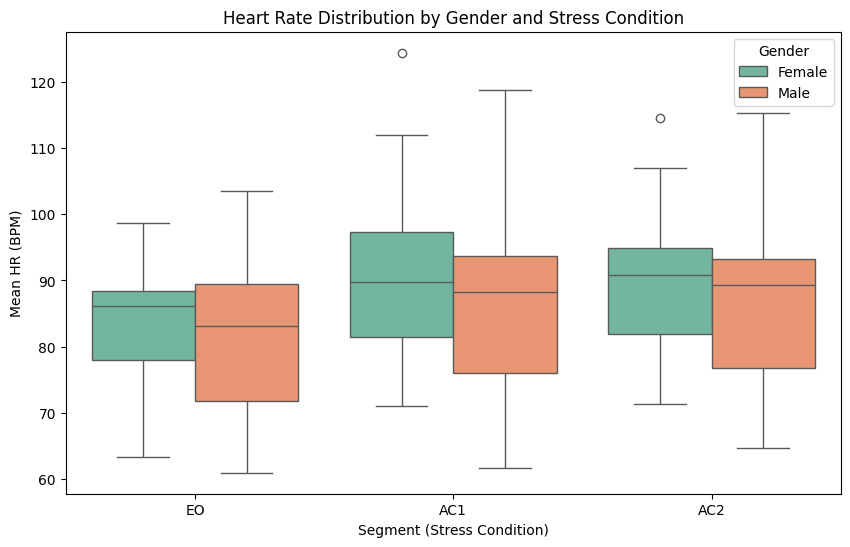

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Mean HR (BPM)', hue='Gender', data=df, palette='Set2')
plt.title('Heart Rate Distribution by Gender and Stress Condition')
plt.xlabel('Segment (Stress Condition)')
plt.ylabel('Mean HR (BPM)')
plt.legend(title='Gender')

plt.show()

Both genders exhibit similar patterns in terms of heart rate medians, though females appear to have slightly higher heart rate variability under the AC1 condition. The presence of outliers in AC1 and AC2 suggests that some individuals experience significantly elevated heart rates in these scenarios.

# HRV Measures by Stress Level
## How does HRV change between baseline, low stress, and high stress?

<ipython-input-34-9d62b67bf70b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='AVNN (ms)', data=df, palette='RdYlGn')


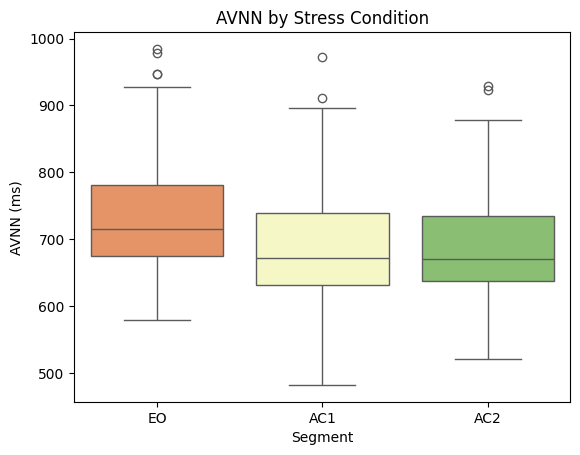

In [ ]:
sns.boxplot(x='Segment', y='AVNN (ms)', data=df, palette='RdYlGn')
plt.title('AVNN by Stress Condition')
plt.show()

It shows a decrease in HRV from the baseline condition (EO) to low stress (AC1) and high stress (AC2). This suggests that as stress increases, the variability in heart rate decreases, reflecting a physiological response to stress where the heart beats more consistently and with less variability.

## How does heart rate variability (SDNN) differ by gender?

<ipython-input-27-26d0a52baf27>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='SDNN (ms)', data=df, palette='Set2')


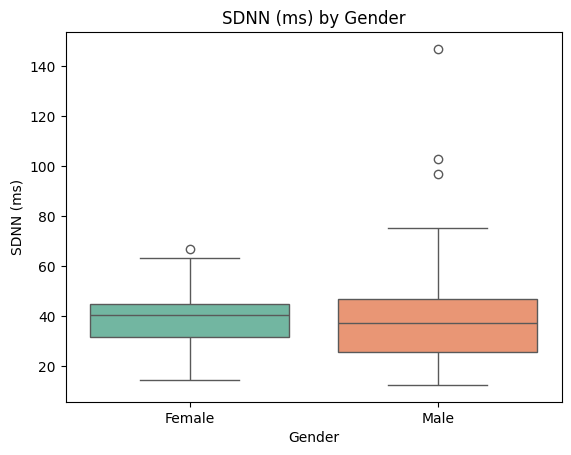

In [ ]:
sns.boxplot(x='Gender', y='SDNN (ms)', data=df, palette='Set2')
plt.title('SDNN (ms) by Gender')
plt.show()

 Males tend to have higher and more variable heart rate variability compared to females, suggesting potential differences in autonomic regulation between genders. This insight can inform gender-specific approaches in stress or health management.

# ECG vs EEG Analysis (RMSSD vs Alpha Power)
## Is there any relationship between HRV and brainwave activity (Alpha power)?

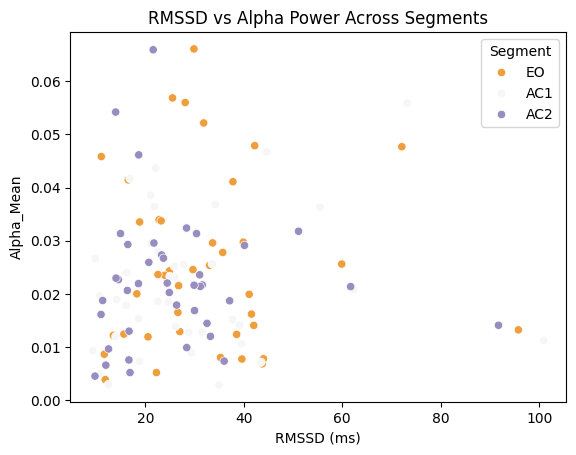

In [ ]:
sns.scatterplot(x='RMSSD (ms)', y='Alpha_Mean', hue='Segment', data=df, palette='PuOr')
plt.title('RMSSD vs Alpha Power Across Segments')
plt.show()


It shows no clear relationship between RMSSD (HRV) and Alpha power across segments. This suggests that HRV and Alpha brainwave activity may not be directly correlated under these stress conditions.

## Does stress level affect the balance between sympathetic and parasympathetic nervous systems?

<ipython-input-13-da86cee06fe0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='LF/HF Ratio', data=df, palette='coolwarm')


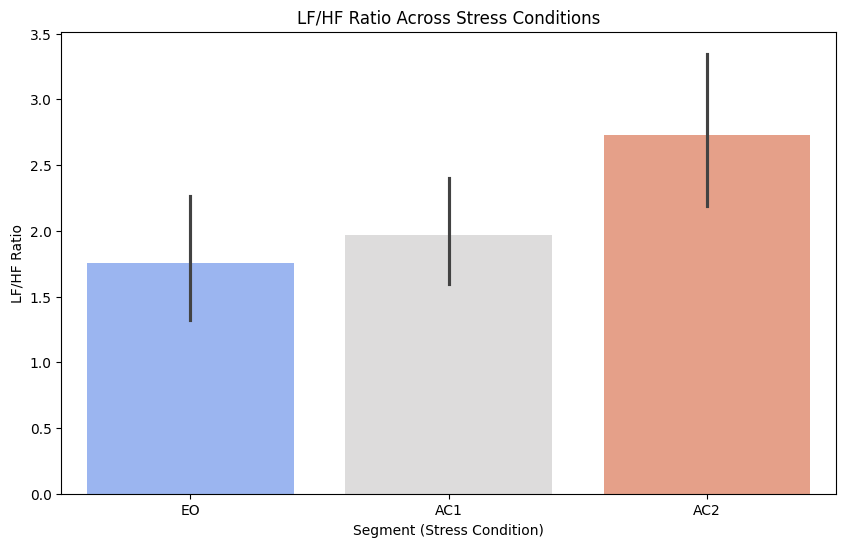

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='LF/HF Ratio', data=df, palette='coolwarm')
plt.title('LF/HF Ratio Across Stress Conditions')
plt.xlabel('Segment (Stress Condition)')
plt.ylabel('LF/HF Ratio')
plt.show()

 Higher stress levels lead to a higher LF/HF Ratio, indicating a shift towards sympathetic dominance. This suggests that stress indeed affects the balance between the sympathetic and parasympathetic nervous systems, highlighting the physiological impact of stress on autonomic regulation.

# Gender vs LF/HF Ratio
## Does gender influence the balance between sympathetic and parasympathetic nervous systems?

<ipython-input-37-82186972ecdf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='LF/HF Ratio', data=df, palette='Paired')


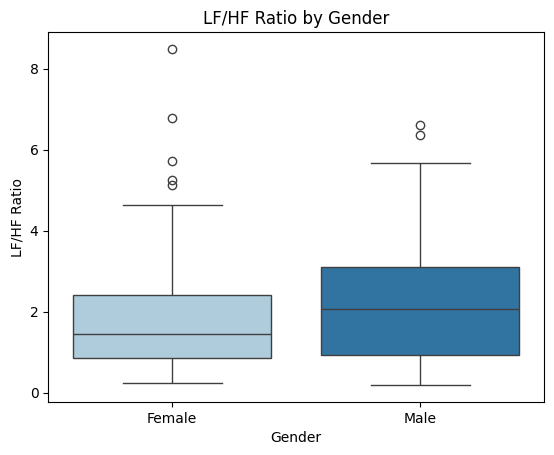

In [ ]:
sns.boxplot(x='Gender', y='LF/HF Ratio', data=df, palette='Paired')
plt.title('LF/HF Ratio by Gender')
plt.show()

Males generally exhibit a higher LF/HF Ratio, suggesting a greater balance towards sympathetic dominance compared to females. This gender-specific trend highlights potential differences in autonomic regulation between men and women.

# Correlation Heatmap of HRV Measures
## How are heart rate variability measures related?

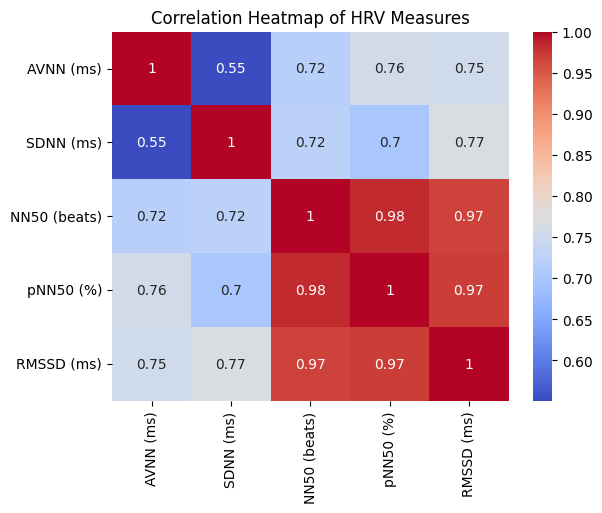

In [ ]:
corr_matrix = df[['AVNN (ms)', 'SDNN (ms)', 'NN50 (beats)', 'pNN50 (%)', 'RMSSD (ms)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of HRV Measures')
plt.show()

Heart rate variability measures are closely interrelated, with some pairs (like RMSSD and pNN50) almost perfectly correlated. This interconnection indicates these measures capture similar aspects of autonomic regulation.

## Correlation Heatmap of EEG/ECG Features

In [ ]:
## Exclude non-numeric columns and the 'subject no' column
numeric_df = df.drop(columns=['Subject NO.']).select_dtypes(include=['float64', 'int64'])

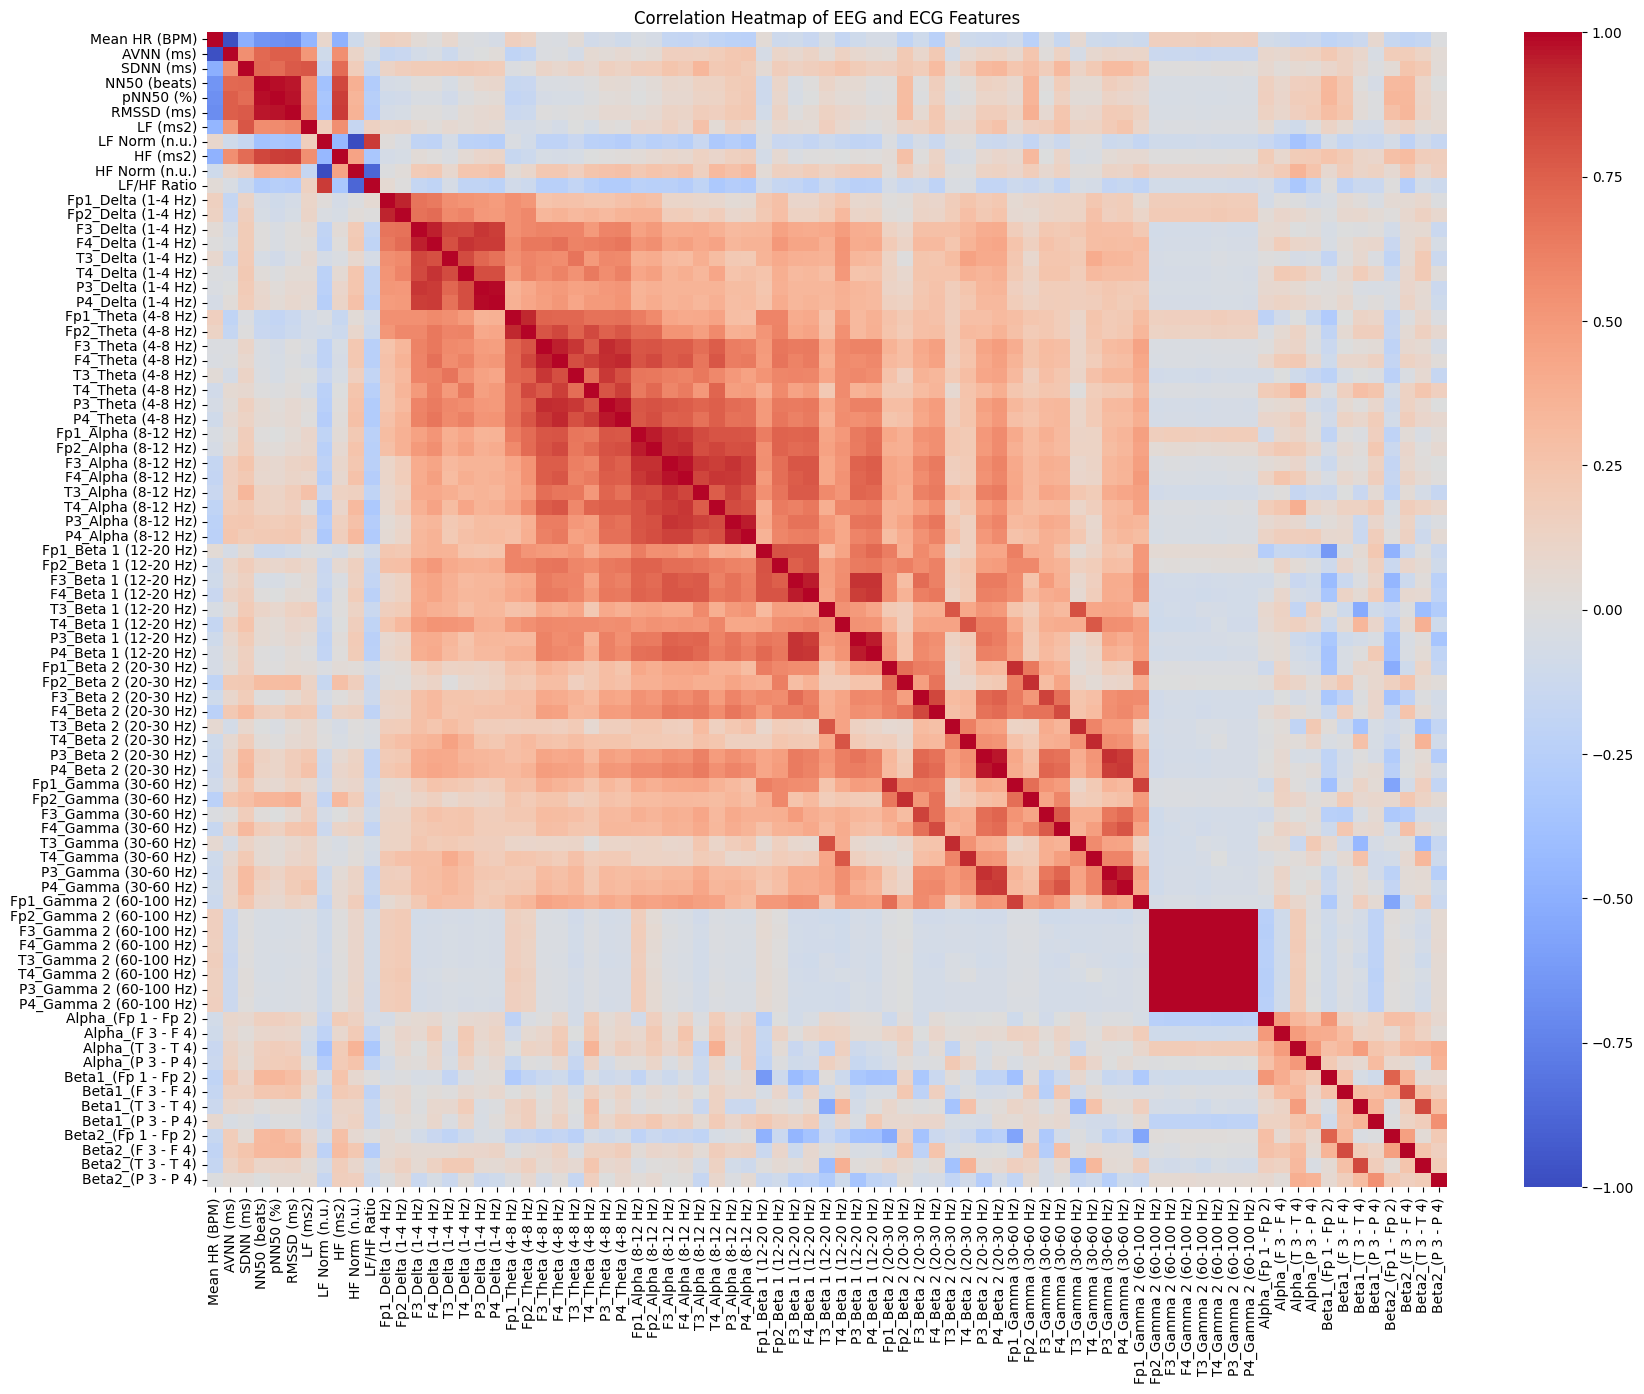

In [ ]:
plt.figure(figsize=(20, 15))
correlation_matrix = numeric_df.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Heatmap of EEG and ECG Features")
plt.show()

# EEG Power Band Differences between Conditions
## How does Alpha and Beta power vary across stress conditions?

<ipython-input-14-a3a23fccbfaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=band, data=df, palette='coolwarm')


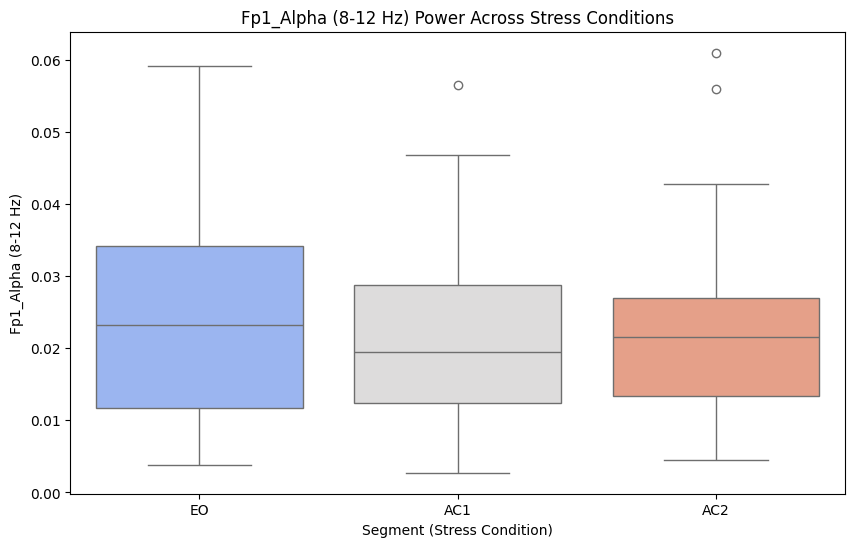

<ipython-input-14-a3a23fccbfaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=band, data=df, palette='coolwarm')


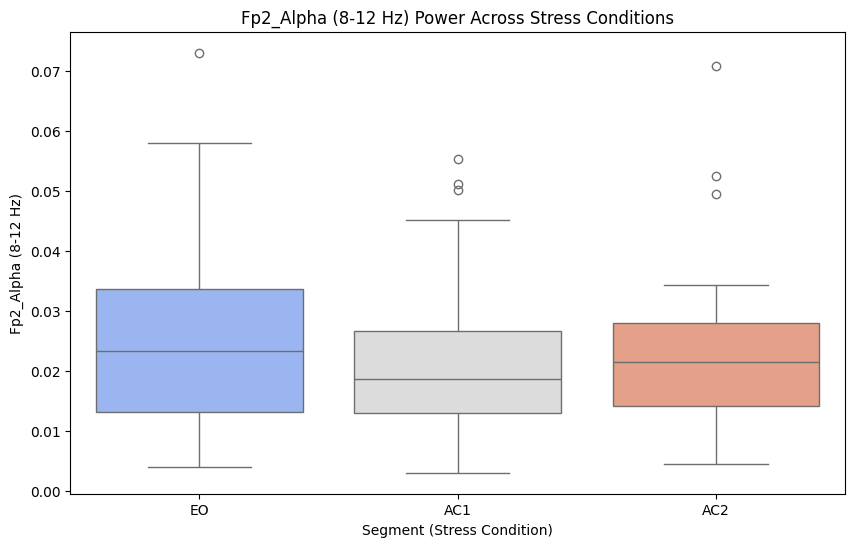

<ipython-input-14-a3a23fccbfaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=band, data=df, palette='coolwarm')


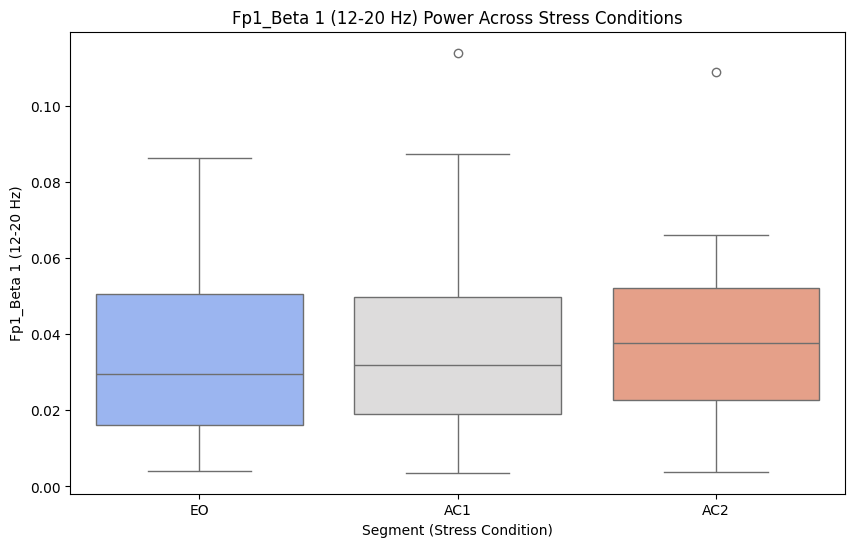

<ipython-input-14-a3a23fccbfaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=band, data=df, palette='coolwarm')


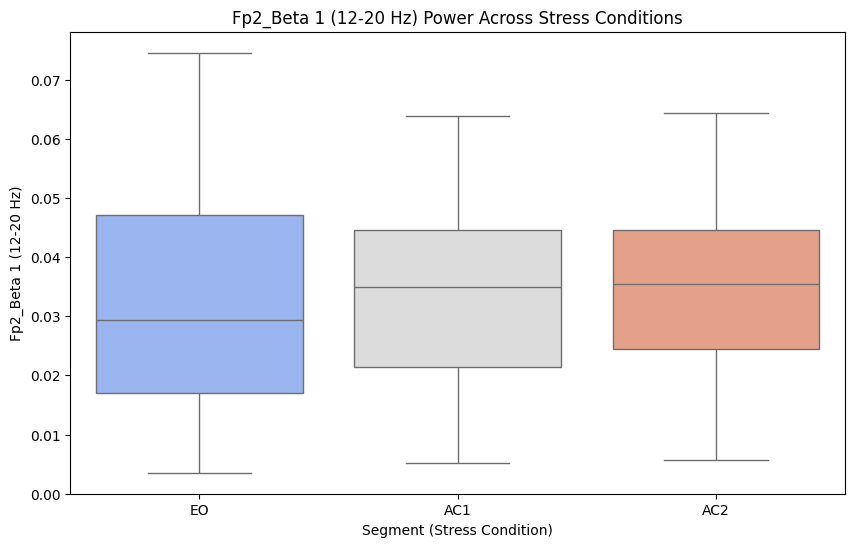

In [ ]:
power_bands = ['Fp1_Alpha (8-12 Hz)', 'Fp2_Alpha (8-12 Hz)', 'Fp1_Beta 1 (12-20 Hz)', 'Fp2_Beta 1 (12-20 Hz)']

for band in power_bands:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segment', y=band, data=df, palette='coolwarm')
    plt.title(f'{band} Power Across Stress Conditions')
    plt.xlabel('Segment (Stress Condition)')
    plt.ylabel(f'{band}')
    plt.show()


 Alpha power decreases with stress, whereas Beta power remains relatively stable with minor variations. Gender differences are notable in Beta power levels, but stress conditions don’t drastically alter Beta activity.

##  How does alpha brainwave activity vary with stress?

<ipython-input-7-4df5217ab1a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Segment', y='Fp1_Alpha (8-12 Hz)', data=df, palette='coolwarm', alpha=0.6)
<ipython-input-7-4df5217ab1a0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Alpha_Mean', data=average_alpha, palette='Spectral', alpha=0.8)


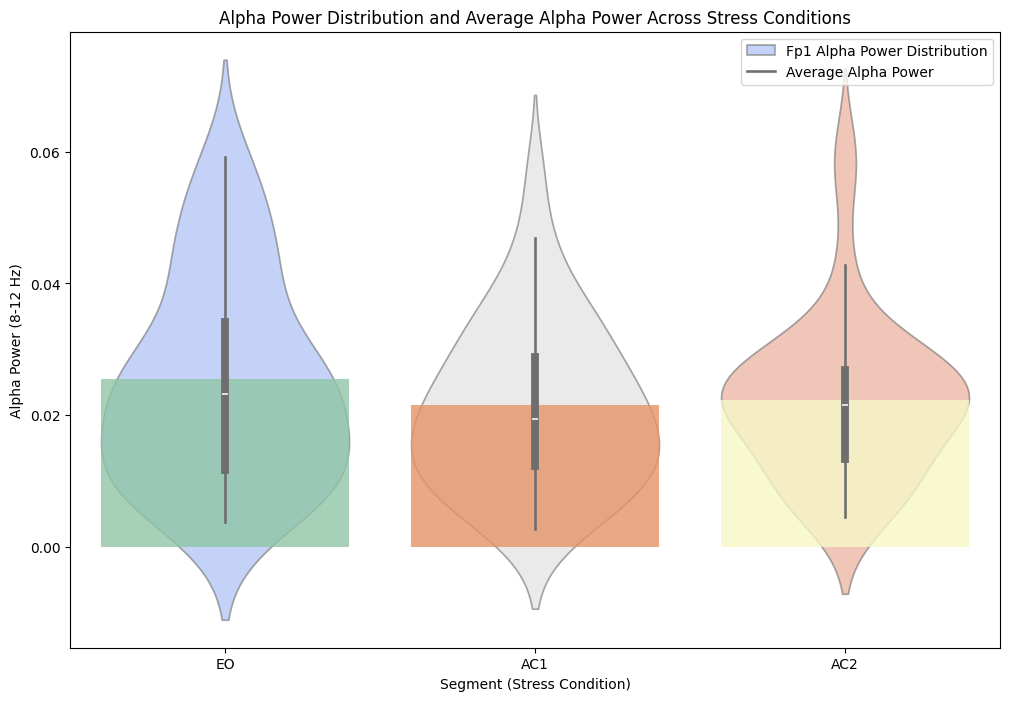

In [ ]:
plt.figure(figsize=(12, 8))

# Create a violin plot for Alpha Power in Fp1
sns.violinplot(x='Segment', y='Fp1_Alpha (8-12 Hz)', data=df, palette='coolwarm', alpha=0.6)

# Calculate average Alpha power across segments and add it as a bar plot
alpha_cols = ['Fp1_Alpha (8-12 Hz)', 'Fp2_Alpha (8-12 Hz)']
df['Alpha_Mean'] = df[alpha_cols].mean(axis=1)

# Calculate average Alpha power for each segment
average_alpha = df.groupby('Segment')['Alpha_Mean'].mean().reset_index()

# Overlay the bar plot for Average Alpha Power
sns.barplot(x='Segment', y='Alpha_Mean', data=average_alpha, palette='Spectral', alpha=0.8)

# Set title and labels
plt.title('Alpha Power Distribution and Average Alpha Power Across Stress Conditions')
plt.xlabel('Segment (Stress Condition)')
plt.ylabel('Alpha Power (8-12 Hz)')

# Add a legend
plt.legend(['Fp1 Alpha Power Distribution', 'Average Alpha Power'], loc='upper right')

# Show the plot
plt.show()


Alpha brainwave activity tends to drop with increasing stress levels, indicating a potential inverse relationship between alpha power and stress. This highlights how stress can dampen certain brain activities, useful for stress management strategies.

##  Is there a significant difference in beta activity between genders?

<ipython-input-31-3f8cde4d6056>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Beta_Mean', data=df, palette='Set3')


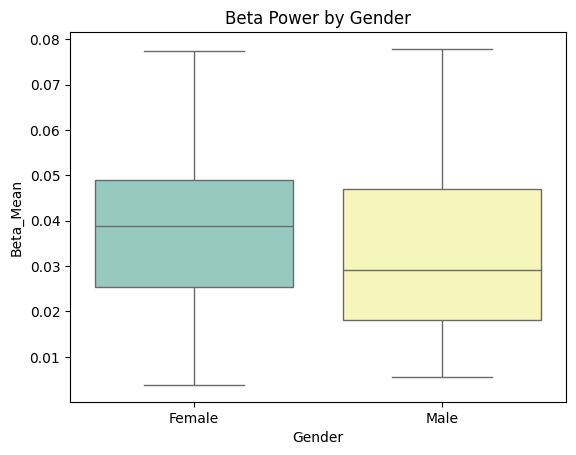

In [ ]:
beta_cols = ['Fp1_Beta 1 (12-20 Hz)', 'Fp2_Beta 1 (12-20 Hz)']
df['Beta_Mean'] = df[beta_cols].mean(axis=1)
sns.boxplot(x='Gender', y='Beta_Mean', data=df, palette='Set3')
plt.title('Beta Power by Gender')
plt.show()

No significant difference in beta activity between genders. Both males and females show similar distributions of beta power, indicating that gender doesn't substantially influence beta brainwave activity in this dataset.

# Frequency Distribution of Fp1 and Fp2 Beta Power
##  What is the distribution of Beta power among participants?

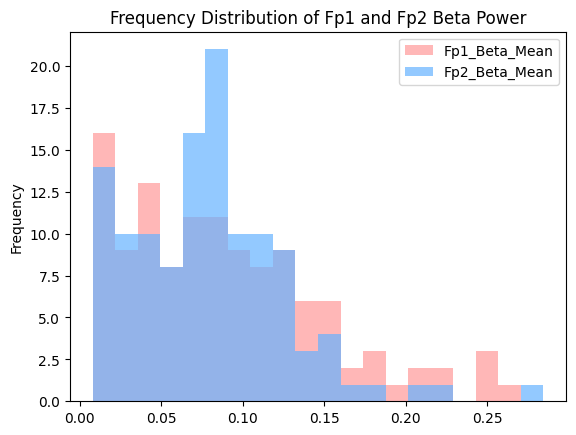

In [ ]:
df['Fp1_Beta_Mean'] = df['Fp1_Beta 1 (12-20 Hz)'] + df['Fp1_Beta 2 (20-30 Hz)']
df['Fp2_Beta_Mean'] = df['Fp2_Beta 1 (12-20 Hz)'] + df['Fp2_Beta 2 (20-30 Hz)']
df[['Fp1_Beta_Mean', 'Fp2_Beta_Mean']].plot(kind='hist', bins=20, alpha=0.7, color=['#FF9999', '#66B2FF'])
plt.title('Frequency Distribution of Fp1 and Fp2 Beta Power')
plt.show()


Beta power distribution varies notably among participants, with distinct peaks at different values for channels Fp1 and Fp2. This suggests individual differences in Beta activity, which can be insightful for understanding personalized brain function patterns.

## What is the relationship between alpha and beta power under different stress conditions?

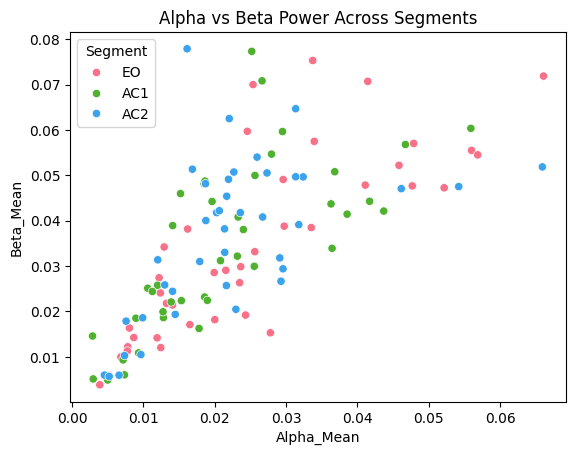

In [ ]:
sns.scatterplot(x='Alpha_Mean', y='Beta_Mean', hue='Segment', data=df, palette='husl')
plt.title('Alpha vs Beta Power Across Segments')
plt.show()


Higher alpha power generally accompanies higher beta power, indicating a consistent relationship. This supports that brainwave activity patterns are linked and likely react together under different stressors.

# Alpha/Beta Ratio by Segment
## How does the Alpha/Beta ratio change with stress?

<ipython-input-35-3e294c77db34>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Alpha/Beta_Ratio', data=df, palette='spring')


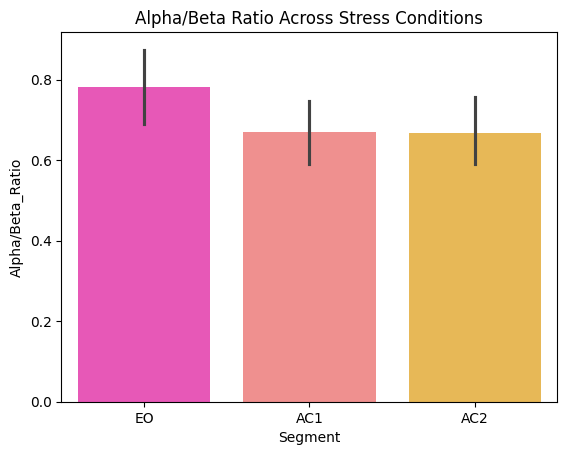

In [ ]:
df['Alpha/Beta_Ratio'] = df['Alpha_Mean'] / df['Beta_Mean']
sns.barplot(x='Segment', y='Alpha/Beta_Ratio', data=df, palette='spring')
plt.title('Alpha/Beta Ratio Across Stress Conditions')
plt.show()

The Alpha/Beta ratio drops significantly as stress increases, suggesting higher stress levels lead to lower alpha relative to beta power. This could be an indicator of heightened cognitive activity or stress response.

## Stress-Induced Changes in Mean HR and LF/HF Ratio (Grouped by Gender)

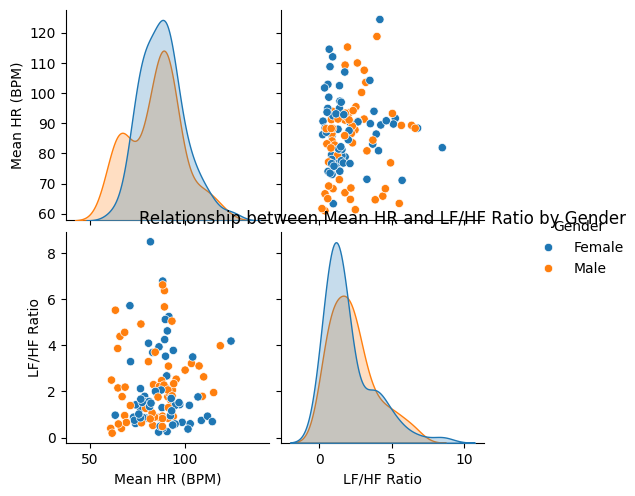

In [ ]:
sns.pairplot(df, hue='Gender', vars=['Mean HR (BPM)', 'LF/HF Ratio'], kind='scatter')
plt.title('Relationship between Mean HR and LF/HF Ratio by Gender')
plt.show()

Males tend to have higher Mean HR and LF/HF Ratio compared to females. The spread in the scatter plots indicates variability in both metrics across genders. This suggests distinct autonomic responses between genders, crucial for personalized health assessments.

# Brainwave Power Distribution by Region (Delta, Theta, Alpha, Beta, Gamma)
## How is brainwave power distributed across regions and wave types?

In [ ]:
brainwaves = [
    'Fp1_Delta (1-4 Hz)', 'Fp2_Delta (1-4 Hz)',
    'Fp1_Theta (4-8 Hz)', 'Fp2_Theta (4-8 Hz)',
    'Fp1_Alpha (8-12 Hz)', 'Fp2_Alpha (8-12 Hz)',
    'Fp1_Beta 1 (12-20 Hz)', 'Fp2_Beta 1 (12-20 Hz)',
    'Fp1_Gamma (30-60 Hz)', 'Fp2_Gamma (30-60 Hz)'
]

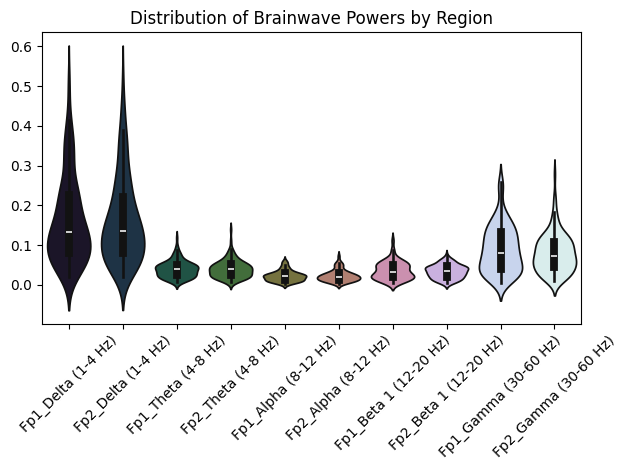

In [ ]:
# Plot the distribution of the brainwave data
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(data=df[brainwaves], palette='cubehelix')
plt.title('Distribution of Brainwave Powers by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Delta waves (1-4 Hz) dominate with the highest power distribution, while Beta 1 waves (12-20 Hz) show the lowest power. Gamma waves (30-60 Hz) have notable power, slightly surpassing Beta 1. This plot vividly illustrates the distinct power profiles of various brainwaves across different brain regions, which is crucial for understanding the complexities of brain activity.